# Training Linear Models

In [95]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Linear Regression

### Normal equation

In [96]:
import numpy as np 

X = 2 * np.random.rand(100,1)

In [97]:
X[:5]

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728]])

In [98]:
X.mean()

0.9403614867564187

In [99]:
y = 4 + 3 * X + np.random.randn(100, 1)

In [100]:
y.shape

(100, 1)

In [101]:
y[:5]

array([[6.33428778],
       [9.40527849],
       [8.48372443],
       [5.60438199],
       [4.71643995]])

In [102]:
myrand = np.random.rand(100,2)

In [103]:
myrandn = np.random.randn(100,2)

In [104]:
print(myrand.max())
print(myrandn.max())

0.9905051420006733
3.0788808084552377


In [105]:
print(myrand.min())
print(myrandn.min())

0.01083765148029836
-2.301921164735585


In [106]:
print(myrand.mean())
print(myrandn.mean())

0.5113031891012685
-0.06726552064111856


In [107]:
print(myrand.std())
print(myrandn.std())

0.2937289151216894
0.992642617040984


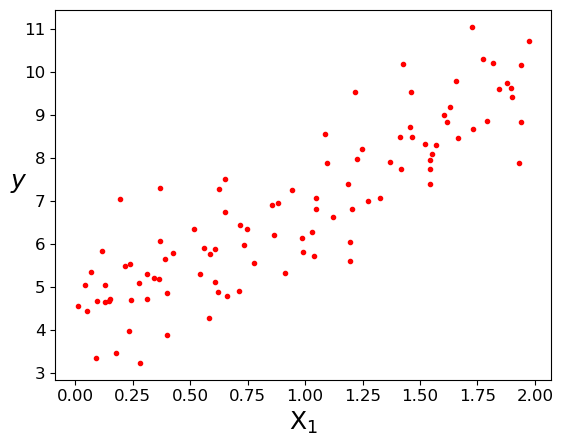

In [108]:
plt.plot(X,y,"r.")
plt.xlabel("X$_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.show()

Compute $\hat{\uptheta}$ with the Normal Equation

$$
\hat{\boldsymbol{\uptheta}} = \lparen \mathbf{X}^{\intercal}\mathbf{X}\rparen^{-1} \mathbf{X}^{\intercal}\mathbf{y}
$$

In [109]:
X_b = np.c_[np.ones((100, 1)), X]

In [110]:
X_b.shape

(100, 2)

In [111]:
X_b[:5]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728]])

In [112]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.21509616],
       [2.77011339]])

Make predictions using $\hat{\uptheta}$.

In [116]:
X_new = np.array([[0],[2]])
X_new

array([[0],
       [2]])

In [117]:
X_new_b = np.c_[np.ones((2,1)), X_new] # add x0 = 1 to each instance
X_new_b

array([[1., 0.],
       [1., 2.]])

In [118]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

Saving figure linear_model_predictions_plot


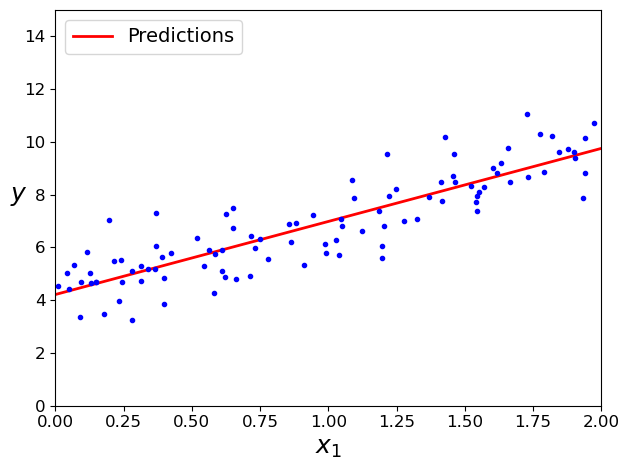

In [120]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

Using Linear Regression

In [121]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [122]:
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

Calling least squares directly.

In [124]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])